In [15]:
import numpy as np 
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

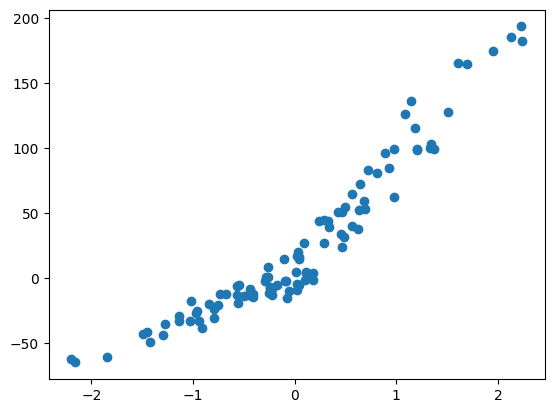

In [16]:
x, y =make_regression(n_samples=100, n_features=1, noise=10)
#On change les y juste pour avoir une courbe et non pas une ligne
y =y+abs(y/2)
plt.scatter(x, y)

In [17]:
print(x.shape)
y=y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)
(100, 1)


In [18]:
X=np.hstack((x**2,x, np.ones(x.shape)))
print(X.shape)
print(X[:10])

(100, 3)
[[ 4.82928286e+00 -2.19756294e+00  1.00000000e+00]
 [ 1.30553555e+00  1.14260034e+00  1.00000000e+00]
 [ 5.70248299e-01 -7.55147865e-01  1.00000000e+00]
 [ 5.01572408e+00  2.23958123e+00  1.00000000e+00]
 [ 4.08596220e-01  6.39215316e-01  1.00000000e+00]
 [ 3.14727671e-01  5.61005945e-01  1.00000000e+00]
 [ 5.99666532e-02 -2.44880896e-01  1.00000000e+00]
 [ 1.04353042e-03  3.23037215e-02  1.00000000e+00]
 [ 2.03061335e+00 -1.42499591e+00  1.00000000e+00]
 [ 2.20576305e-01  4.69655517e-01  1.00000000e+00]]


In [19]:
# On ajoute un paramètre à teta car nous avons 3 maintenant a,b et c
teta = np.random.randn(3, 1)
print(teta.shape)
print(teta)

(3, 1)
[[-0.08310773]
 [-0.49640325]
 [ 1.20531448]]


In [20]:
def model(X, teta):
    return X.dot(teta)

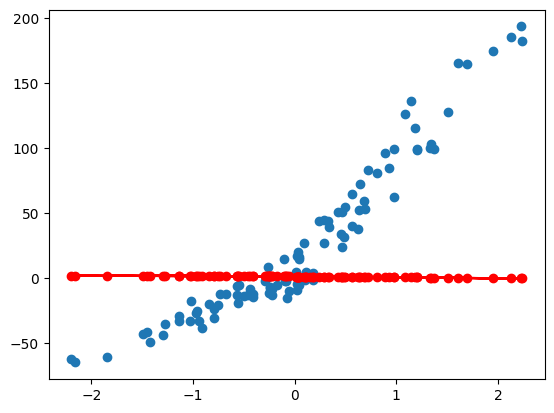

In [21]:
plt.scatter(x, y)
plt.plot(x, model(X, teta), c='r')
plt.scatter(x, model(X,teta), c='r')

In [22]:
def cost_function(X, y, teta):
    m=len(y)
    return 1/(2*m) * np.sum((model(X, teta)-y)**2)

In [23]:
def grad(X, y, teta):
    m=len(y)
    return 1/m * X.T.dot(model(X, teta)-y)

In [24]:
def gradient_descent(X, y, teta, alpha, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        teta = teta - alpha*grad(X, y, teta)
        cost_history[i] = cost_function(X, y, teta)
    return teta, cost_history

In [25]:
teta_final, cost_history = gradient_descent(X, y, teta, alpha=0.01, n_iterations=1000)
print(teta_final)

[[12.4792915 ]
 [58.95432417]
 [12.03702698]]


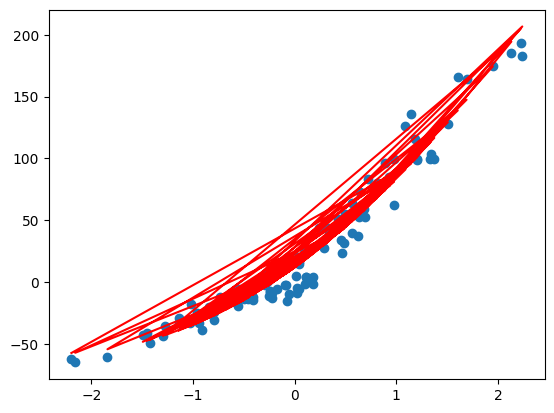

In [26]:
predictions = model(X, teta_final)
plt.scatter(x,y)
plt.plot(x,predictions, c='r')

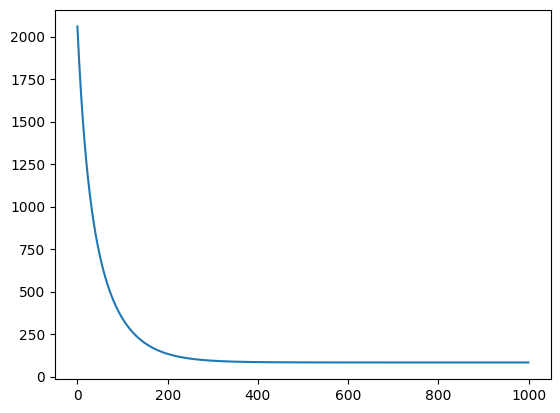

In [27]:
plt.plot(range(1000), cost_history)
# On remarque d'après la courbe de cost_history que la descente de Gradient
# converge effectivement vers la plus petite valeur c'est à dire 
# que la machine est entrain d'apprendre
# Le modèle ne peut mieux apprendre que ça

In [29]:
def coef_determination(y, pred):
    u = ((y-pred)**2).sum()
    v = ((y-y.mean())**2).sum()
    return 1- u/v

coef_determination(y, predictions)

0.9534565488979049